In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import os
from PIL import Image
from IPython.display import display

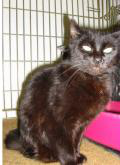

In [7]:
with Image.open('/home/dawidkubicki/Datasets/CATS_DOGS/train/CAT/8377.jpg') as im:
    display(im)

In [8]:
path = "/home/dawidkubicki/Datasets/CATS_DOGS/"
img_names = []

for folder, subfolder, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+"/"+img)

In [9]:
len(img_names)

24994

In [10]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
    except:
        rejected.append(item)

/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
 

In [11]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [12]:
df = pd.DataFrame(img_sizes)

In [14]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [15]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [18]:
dog = Image.open(f"{path}train/DOG/14.jpg")

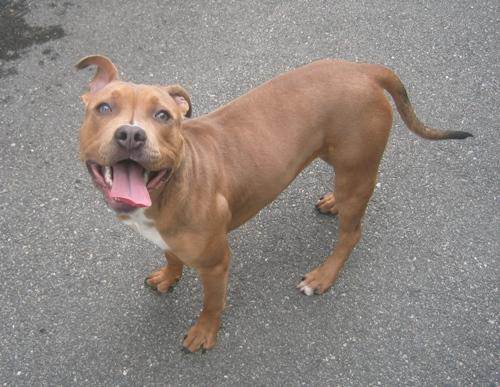

In [19]:
display(dog)

In [20]:
dog.size

(500, 387)

In [21]:
type(dog)

PIL.JpegImagePlugin.JpegImageFile

In [22]:
dog.getpixel((0,0)) # 0 -- 255

(90, 95, 98)

In [23]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


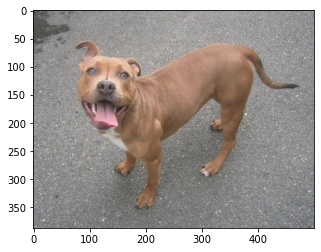

In [29]:
plt.imshow(np.transpose(im.numpy(),(1,2,0))) # you can use transpose to reshape order of shape

In [32]:
im[:,0,0] # PyTorch automatically divide it by 255

tensor([0.3529, 0.3725, 0.3843])

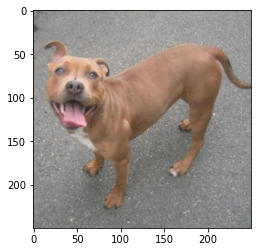

In [36]:
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

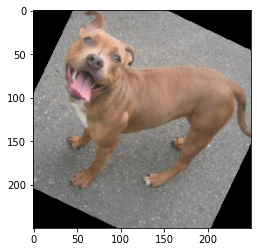

In [86]:
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


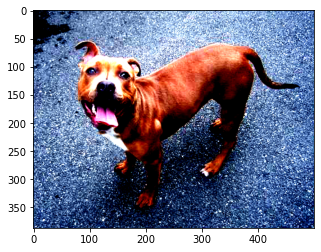

In [87]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))